In [76]:
#import all the packages

from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#Creation of synthetic data using make blobs
#Parameter - set number of samples = 200, features(dimensions) = 4, number of classes = 2, number of clusters = 2
samps = 200
feats = 4
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)

In [78]:
#Store the input data and the associated labels to a variable
X = Input_data[0]
Y = Input_data[1]

In [79]:
X.shape, Y.shape

((200, 4), (200,))

In [80]:
#Create a pandas data frame for the input data 
X_df = pd.DataFrame(X, columns=['dim'+ str(i) for i in range(1,feats+1)])
X_df['y'] = Y

In [81]:
X_df

,dim1,dim2,dim3,dim4,y
0,0.122168,-0.328448,-3.079563,-2.814002,0
1,-0.478837,1.928938,-3.390538,-4.242829,0
2,-1.184439,1.780785,-3.751710,-3.186555,0
3,-1.019451,1.237601,-4.952421,-1.335578,0
4,-2.040461,3.462441,-4.007106,-1.423931,0
...,...,...,...,...,...
195,-2.192706,-6.211363,-4.024194,-1.490425,1
196,-4.188136,-3.128829,-5.432428,-1.146411,1
197,-3.063929,-4.022626,-1.924937,-2.896924,1
198,-2.312963,-4.849826,-2.339292,-1.901017,1


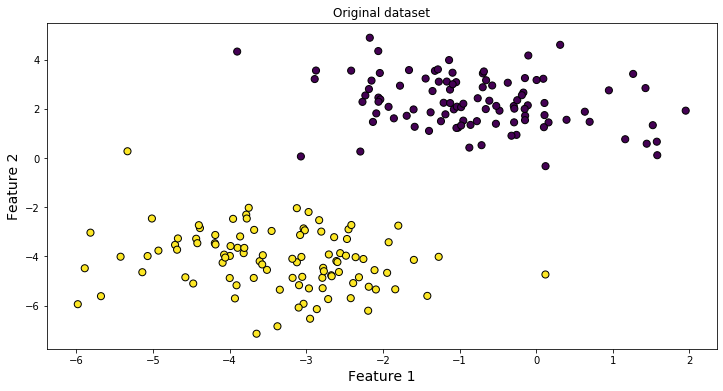

In [82]:
#Plot of the input data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(X_df['dim1'], X_df['dim2'], s=50, c=X_df['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
#Function to create a proximity matrix
#I/p params : The model we're using of RF, the input data that the model is being applied to 

#That is, for all pairs of samples in your dataset, 
#iterate over the decision trees in the forest and count the number of times they fall in the same leaf 
#i.e., the number of times 'apply' gives the same node id for both samples in the pair.

#LINK FOR GENERATING THE PROXIMITY MATRIX:-
#https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier

def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   


In [88]:
#Define a random forest classfier model

model = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt')
model.fit(X, Y)
#Calling the proximity matrix function to obtain the proximity matrix from the RF model.

prox_mat = proximityMatrix(model, X, normalize=True)

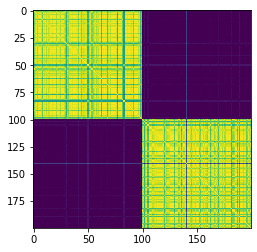

In [89]:
#Display the proximity matrix 
plt.imshow(prox_mat)

In [90]:
#Performing clustering on the output of the RF to check its efficiency

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(prox_mat) 
score = adjusted_rand_score(Y, predict_labels)

print("labels\n", Y) #True labels
print("predict\n", predict_labels) #Labels that were predicted
print("Adjusted Rand Score:", score) #Adjusted rand score to check how well the clusters are identified.

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 0.9799995050507551


In [91]:
#Clustering for non-euclidean 
clust1 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single")
clust2 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="complete")
clust3 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")

pred_labels1 = clust1.fit_predict(prox_mat) 
pred_labels2 = clust2.fit_predict(prox_mat) 
pred_labels3 = clust3.fit_predict(prox_mat)

score_1 = adjusted_rand_score(Y, pred_labels1)
score_2 = adjusted_rand_score(Y, pred_labels2)
score_3 = adjusted_rand_score(Y, pred_labels3)


print("Adjusted Rand Score:", score_1, score_2, score_3) #Adjusted rand score to check how well the clusters are identified.

Adjusted Rand Score: 0.0 -0.0016489457015669852 -0.00019903458175581754


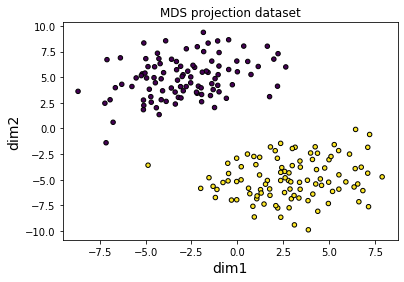

In [92]:
from sklearn.manifold import MDS

#Reduce the number of components directly from the input dataset using MDS
#This will, with the use of most significant Eigen vectors(in the case of metric MDS) keep the dimensions that gives most amount of information
model_mds1 = MDS(n_components=2, metric = True) #, dissimilarity='precomputed', random_state=1)

out = model_mds1.fit_transform(X)
out *= np.sqrt((X ** 2).sum()) / np.sqrt((out ** 2).sum())

plt.scatter(out[:, 0], out[:, 1],s = 20, c=X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset")
plt.show()


In [73]:
#Perform agglomerative clustering to check the efficiency of MDS's dimensionality reduction: We went from 4 -> 2 dims
cluster2 = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels2 = cluster.fit_predict(out)
score2 = adjusted_rand_score(Y, predict_labels2)

print("labels\n", Y)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted Rand Score: 1.0


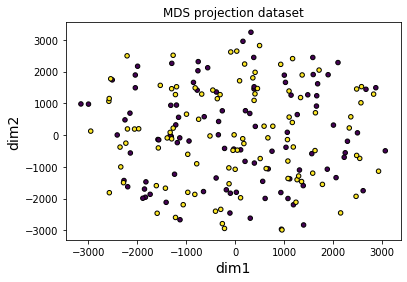

In [72]:
#Perform MDS on the RF's proximity matrix
#First, keeping the number of dimensions the same as the original dataset.
#This is for metric MDS 
model_mds2 = MDS(n_components=4, metric = True, dissimilarity='precomputed', random_state=1)

embed = model_mds2.fit_transform(prox_mat)


plt.scatter(embed[:, 0], embed[:, 1],s = 20, c=X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset")
plt.show()

In [47]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

cluster3 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")
predict_labels2 = cluster.fit_predict(embed)
score2 = adjusted_rand_score(Y, predict_labels2)

print("labels\n", Y)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1]
Adjusted Rand Score: -0.004062274752720177


In [ ]:
#Since fit.tranform of the returns the embedded coordinates
#Should we compute a distance matrix before trying to cluster the data?
#If so, what kind of distance matrix should be construced for this?

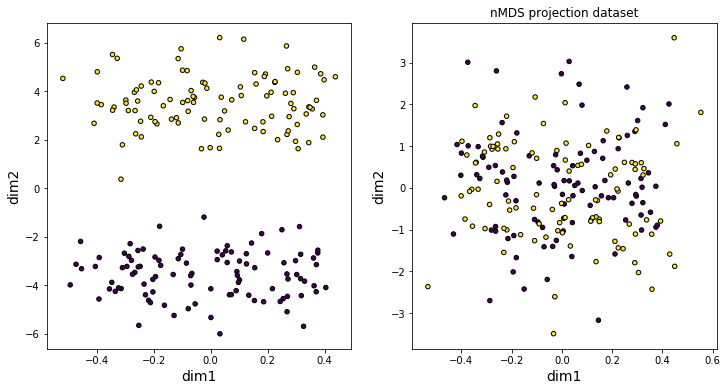

In [70]:
#Trying out non-metric MDS
#We get this by setting the parmeter metric = False, this ensures that the algo consider it to be non-metric computation
#Here, trying to reduce the dimensions to 2 from 4 
nmds_model = MDS(n_components=4, metric = False, dissimilarity='precomputed', random_state=1)

embed_nmds = nmds_model.fit_transform(prox_mat)
plt.figure(figsize=(12,6)) 
plt.subplot(1,2,1)
plt.scatter(embed_nmds[:, 0], X[:, 0], s = 20, c = X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.subplot(1,2,2)
plt.scatter(embed_nmds[:, 1], X[:, 1], s = 20, c = X_df['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("nMDS projection dataset")
plt.show()